# ------------------------Week-10 Minst_Digit------------------------------

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np

## warnings ignore

In [3]:
# Optional: to ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

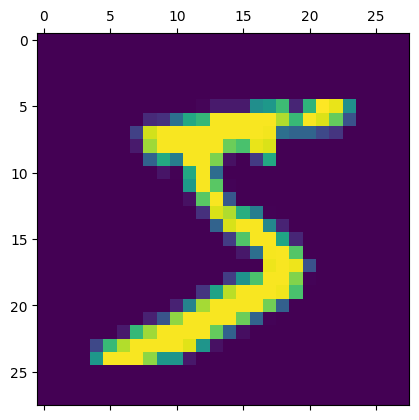

In [5]:
plt.matshow(X_train[0])
plt.show()

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

## Fit the model

In [8]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8774 - loss: 0.4682
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9156 - loss: 0.3037
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9207 - loss: 0.2832
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9237 - loss: 0.2728
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9255 - loss: 0.2672


## Evaluate the model

In [9]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9266 - loss: 0.2659


[0.26589661836624146, 0.9265999794006348]

## Predict the model

In [10]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([2.2180904e-02, 3.7701975e-07, 6.6176340e-02, 9.5219457e-01,
       2.3530584e-03, 9.8233536e-02, 1.1479482e-06, 9.9980026e-01,
       1.0269168e-01, 6.7733455e-01], dtype=float32)

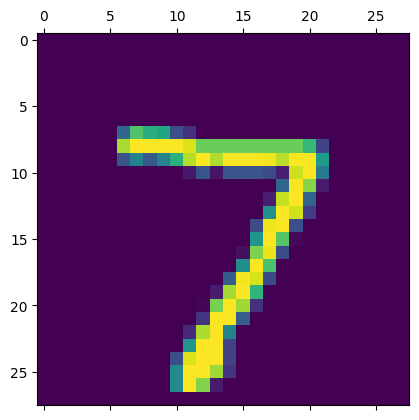

In [11]:
plt.matshow(X_test[0])

In [12]:
np.argmax(y_predicted[0])

np.int64(7)

## Plot the Confusion_matrix

In [13]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [14]:
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [15]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    5,    3,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   7,    9,  931,   15,    8,    1,   12,   11,   35,    3],
       [   4,    0,   21,  923,    0,   16,    2,   12,   23,    9],
       [   1,    1,    6,    1,  911,    0,   10,    5,    9,   38],
       [   9,    3,    3,   40,   10,  759,   15,    9,   37,    7],
       [  12,    3,    6,    1,    8,    7,  916,    2,    3,    0],
       [   1,    6,   23,    4,    6,    0,    0,  955,    2,   31],
       [   7,   11,    6,   19,    9,   21,    9,   13,  874,    5],
       [  11,    7,    1,    9,   24,    6,    0,   24,    8,  919]],
      dtype=int32)>

## Plot the heat map

Text(95.72222222222221, 0.5, 'Truth')

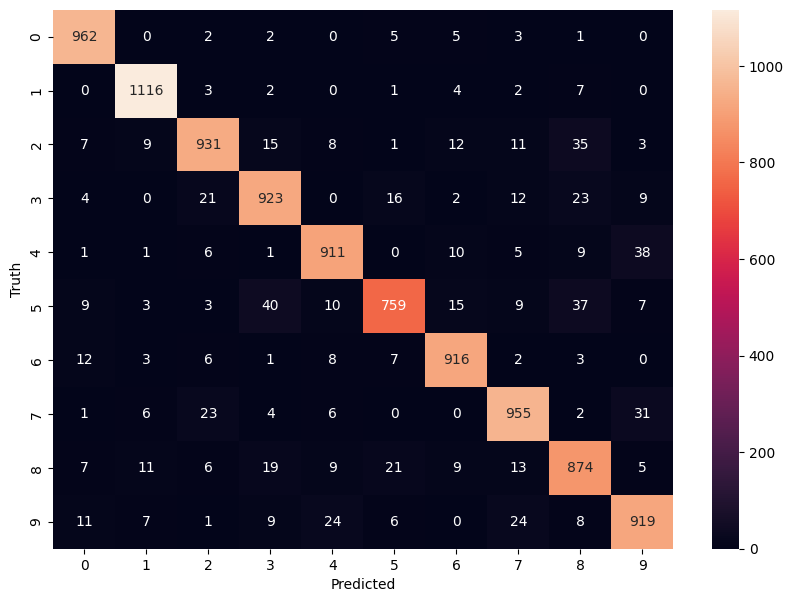

In [18]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')